In [35]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [50]:
class bandit:
    def __init__(self, c = 2, eps = 0.1, ucb = False, epsilon_greedy = False, k = 10):
        self.c = c
        self.eps = eps
        self.ucb = ucb
        self.epsilon_greedy = epsilon_greedy
        self.k = k
        self.q_estimates = np.zeros(k)
        self.q_true = np.random.randn(k)
        self.actions = np.array(range(k))
        self.times_taken = np.zeros(k)
        self.time = 0
    
    def select_action(self):
        # Epsilon-greedy action selection
        if self.epsilon_greedy:
            x = np.random.uniform()
            if x < self.eps:
                return np.random.choice(self.actions)
            return np.argmax(self.q_estimates)
        
        # Upper-Confidence-Bound action selection
        if self.ucb:
            ucb_estimates = self.q_estimates + self.c*np.sqrt(np.log(self.time + 1)/(self.times_taken + 1e-5))
            return np.argmax(ucb_estimates)
            
        
    # Get reward and update q_estimate using constant step size method
    def step(self, action):
        # Get reward for action
        reward = np.random.normal(self.q_true[action], 1)
        
        # Increment t, times_taken[action]
        self.time += 1
        self.times_taken[action] += 1
   
        # Use Sample-averages method to update q_estimate
        self.q_estimates[action] += 1.0/self.times_taken[action] * (reward - self.q_estimates[action])
        
        return reward
    
    # Reset bandit at the beginning of every run
    def reset(self):
        
        self.q_true = np.random.randn(self.k)
        
        self.q_estimates = np.zeros(self.k)
        
        self.times_taken = np.zeros(self.k)
        
        self.best_action = np.argmax(self.q_true)

        
            
    

In [51]:
def simulate(runs, time, bandits):
    best_action_counts = np.zeros((len(bandits), runs, time))
    rewards = np.zeros(best_action_counts.shape)
    for i, bandit in enumerate(bandits):
        for r in tqdm(range(runs)):
            bandit.reset()
            for t in range(time):
                action = bandit.select_action()
                reward = bandit.step(action)
                rewards[i, r, t] = reward
                if action == bandit.best_action:
                    best_action_counts[i, r, t] = 1
    best_action_counts = best_action_counts.mean(axis = 1)
    rewards = rewards.mean(axis = 1)
    return best_action_counts, rewards
 

In [52]:
def figure_2_4(runs=2000, time=2000):
    bandits = []
    bandits.append(bandit(epsilon_greedy=True))
    bandits.append(bandit(ucb = True))
    best_action_counts, rewards = simulate(runs, time, bandits)

    plt.figure(figsize=(10,10))

    plt.plot(best_action_counts[0], label='eps-Greedy eps = 0.1')
    plt.plot(best_action_counts[1], label='UCB c = 2')
    plt.xlabel('steps')
    plt.ylabel('% optimal action')
    plt.legend()
    
    plt.show()


100%|██████████| 2000/2000 [00:56<00:00, 35.24it/s]


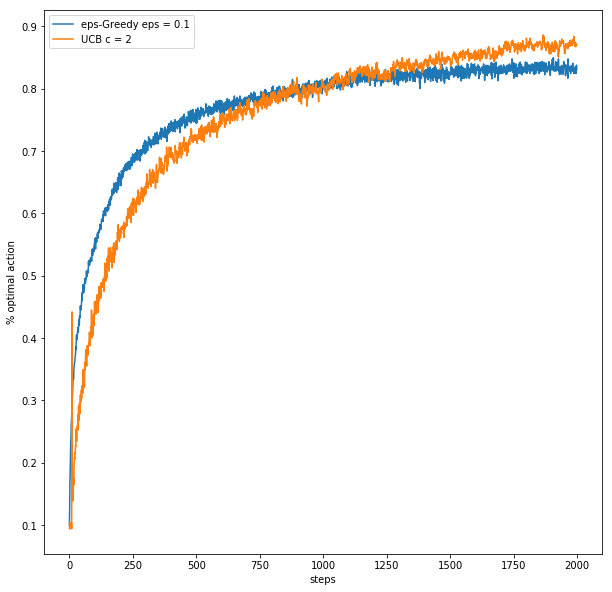

In [49]:
figure_2_4()